# Convolutional Neural Network Application

## Introduction

In this section, we will use the famous [MNIST Dataset](http://yann.lecun.com/exdb/mnist/) to build two Neural Networks capable to perform handwritten digits classification. The first Network is a simple Multi-layer Perceptron (MLP) and the second one is a Convolutional Neural Network (CNN from now on). In other words, our algorithm will say, with some associated error, what type of digit is the presented input.

## Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
<p>- <a href="#ref1">What is Deep Learning</a></p>
<p>- <a href="#ref3">1st part: classify MNIST using a simple model</a></p>
<p>- <a href="#ref4">Evaluating the final result</a></p>
<p>- <a href="#ref5">How to improve our model?</a></p>
<p>- <a href="#ref6">2nd part: Deep Learning applied on MNIST</a></p>
<p>- <a href="#ref7">Summary of the Deep Convolutional Neural Network</a></p>
<p>- <a href="#ref8">Define functions and train the model</a></p>
<p>- <a href="#ref9">Evaluate the model</a></p>
</div>

<a id="ref1"></a>
# What is Deep Learning?

**Brief Theory:** Deep learning (also known as deep structured learning, hierarchical learning or deep machine learning) is a branch of machine learning based on a set of algorithms that attempt to model high-level abstractions in data by using multiple processing layers, with complex structures or otherwise, composed of multiple non-linear transformations.

<img src="https://ibm.box.com/shared/static/gcbbrh440604cj2nksu3f44be87b8ank.png" alt="HTML5 Icon" style="width:600px;height:450px;">

**In Practice, defining the term "Deep":** in this context, deep means that we are studying a Neural Network which has several hidden layers (more than one), no matter what type (convolutional, pooling, normalization, fully-connected etc). The most interesting part is that some papers noticed that Deep Neural Networks with right architectures/hyper-parameters achieve better results than shallow Neural Networks with same computational power (e.g. number of neurons or connections). 

**In Practice, defining "Learning":** In the context of supervised learning, digits recognition in our case,  the learning consists of a target/feature which is to be predicted using a given set of observations with the already known final prediction (label). In our case, the target will be the digit (0,1,2,3,4,5,6,7,8,9) and the observations are the intensity and relative position of pixels. After some training, it's possible to generate a "function" that map inputs (digit image) to desired outputs(type of digit). The only problem is how well this map operation occurs. While trying to generate this "function", the training process continues until the model achieves a desired level of accuracy on the training data.

__Notice:__ This notebook has been created with tensorflow version 1.8.0, and might not work with other versions.

In [1]:
import tensorflow as tf
tf.__version__

'1.8.0'

First we will classify MNIST using a simple Multi-layer percepetron and then, in the second part, we will use deep learning to improve the accuracy of our results.

<a id="ref3"></a>
# 1st part: classify MNIST using a simple model.

We are going to create a simple Multi-layer percepetron, a simple type of Neural Network, to performe classification tasks on the MNIST digits dataset. If you are not familiar with the MNIST dataset, please consider to read more about it: <a href="http://yann.lecun.com/exdb/mnist/">click here</a> 

### What is MNIST?

According to Lecun's website, the MNIST is a: "database of handwritten digits that has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image".

### Import the MNIST dataset using TensorFlow built-in feature

It's very important to notice that MNIST is a high optimized data-set and it does not contain images. You will need to build your own code if you want to see the real digits. Another important side note is the effort that the authors invested on this data-set with normalization and centering operations.  

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


The <span style="background-color:#dcdcdc
"> One-hot = True</span> argument only means that, in contrast to Binary representation, the labels will be presented in a way that only one bit will be on for a specific digit. For example, five and zero in a binary code would be:

<pre>
Number representation:    0
Binary encoding:        [2^5]  [2^4]   [2^3]   [2^2]   [2^1]   [2^0]  
Array/vector:             0      0       0       0       0       0 

Number representation:    5
Binary encoding:        [2^5]  [2^4]   [2^3]   [2^2]   [2^1]   [2^0]  
Array/vector:             0      0       0       1       0       1  
</pre>

Using a different notation, the same digits using one-hot vector representation can be show as: 

<pre>
Number representation:    0
One-hot encoding:        [5]   [4]    [3]    [2]    [1]   [0]  
Array/vector:             0     0      0      0      0     1   

Number representation:    5
One-hot encoding:        [5]   [4]    [3]    [2]    [1]    [0]  
Array/vector:             1     0      0      0      0      0   
</pre>

### Understanding the imported data

The imported data can be divided as follow:

- Training (mnist.train) >>  Use the given dataset with inputs and related outputs for training of NN. In our case, if you give an image that you know that represents a "nine", this set will tell the neural network that we expect a "nine" as the output.  
        - 55,000 data points
        - mnist.train.images for inputs
        - mnist.train.labels for outputs
  
   
- Validation (mnist.validation) >> The same as training, but now the date is used to generate model properties (classification error, for example) and from this, tune parameters like the optimal number of hidden units or determine a stopping point for the back-propagation algorithm  
        - 5,000 data points
        - mnist.validation.images for inputs
        - mnist.validation.labels for outputs
  
  
- Test (mnist.test) >> the model does not have access to this informations prior to the test phase. It is used to evaluate the performance and accuracy of the model against "real life situations". No further optimization beyond this point.  
        - 10,000 data points
        - mnist.test.images for inputs
        - mnist.test.labels for outputs
  

### Creating an interactive section

You have two basic options when using TensorFlow to run your code:

- [Build graphs and run session] Do all the set-up and THEN execute a session to evaluate tensors and run operations (ops) 
- [Interactive session] create your coding and run on the fly. 

For this first part, we will use the interactive session that is more suitable for environments like Jupyter notebooks.

In [3]:
sess = tf.InteractiveSession()

### Creating placeholders

It's a best practice to create placeholders before variable assignments when using TensorFlow. Here we'll create placeholders for inputs ("Xs") and outputs ("Ys").   

__Placeholder 'X':__ represents the "space" allocated input or the images. 
       * Each input has 784 pixels distributed by a 28 width x 28 height matrix   
       * The 'shape' argument defines the tensor size by its dimensions.  
       * 1st dimension = None. Indicates that the batch size, can be of any size.  
       * 2nd dimension = 784. Indicates the number of pixels on a single flattened MNIST image.  
      
__Placeholder 'Y':__ represents the final output or the labels.  
       * 10 possible classes (0,1,2,3,4,5,6,7,8,9)  
       * The 'shape' argument defines the tensor size by its dimensions.  
       * 1st dimension = None. Indicates that the batch size, can be of any size.   
       * 2nd dimension = 10. Indicates the number of targets/outcomes 

__dtype for both placeholders:__ if you not sure, use tf.float32. The limitation here is that the later presented softmax function only accepts float32 or float64 dtypes. For more dtypes, check TensorFlow's documentation <a href="https://www.tensorflow.org/versions/r0.9/api_docs/python/framework.html#tensor-types">here</a>


In [4]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

### Assigning bias and weights to null tensors

Now we are going to create the weights and biases, for this purpose they will be used as arrays filled with zeros. The values that we choose here can be critical, but we'll cover a better way on the second part, instead of this type of initialization.

In [5]:
# Weight tensor
W = tf.Variable(tf.zeros([784, 10], tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10], tf.float32))

### Execute the assignment operation 

Before, we assigned the weights and biases but we did not initialize them with null values. For this reason, TensorFlow need to initialize the variables that you assign.  
Please notice that we're using this notation "sess.run" because we previously started an interactive session.

In [6]:
# Run the op initialize_all_variables using an interactive session
sess.run(tf.initialize_all_variables())

### Adding Weights and Biases to input

The only difference from our next operation to the picture below is that we are using the mathematical convention for what is being executed in the illustration. The tf.matmul operation performs a matrix multiplication between x (inputs) and W (weights) and after the code add biases.


<img src="https://ibm.box.com/shared/static/88ksiymk1xkb10rgk0jwr3jw814jbfxo.png" alt="HTML5 Icon" style="width:400px;height:350px;"> 
<div style="text-align:center">Illustration showing how weights and biases are added to neurons/nodes. </div>


In [7]:
# Mathematical operation to add weights and biases to the inputs
tf.matmul(x, W) + b

<tf.Tensor 'add:0' shape=(?, 10) dtype=float32>

### Softmax Regression

Softmax is an activation function that is normally used in classification problems. It generates the probabilities for the output. For example, our model will not be 100% sure that one digit is the number nine, instead, the answer will be a distribution of probabilities where, if the model is right, the nine number will have the larger probability.

For comparison, below is the one-hot vector for a nine digit label:

0 --> 0  
1 --> 0  
2 --> 0  
3 --> 0  
4 --> 0  
5 --> 0  
6 --> 0  
7 --> 0  
8 --> 0  
9 --> 1  

A machine does not have all this certainty, so we want to know what is the best guess, but we also want to understand how sure it was and what was the second better option. Below is an example of a hypothetical distribution for a nine digit:

0 -->.0.1%  
1 -->...2%  
2 -->...3%  
3 -->...2%  
4 -->..12%  
5 -->..10%  
6 -->..57%  
7 -->..20%  
8 -->..55%  
9 -->..80%  

In [8]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

Logistic function output is used for the classification between two target classes 0/1. Softmax function is generalized type of logistic function. That is, Softmax can output a multiclass categorical probability distribution. 

### Cost function

It is a function that is used to minimize the difference between the right answers (labels) and estimated outputs by our Network. 

In [9]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

### Type of optimization: Gradient Descent

This is the part where you configure the optimizer for your Neural Network. There are several optimizers available, in our case we will use Gradient Descent that is well stablished.

In [10]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

### Training batches

Train using minibatch Gradient Descent.

In practice, Batch Gradient Descent is not often used because is too computationally expensive. The good part about this method is that you have the true gradient, but with the expensive computing task of using the whole dataset in one time. Due to this problem, Neural Networks usually use minibatch to train.

In [11]:
# Load 50 training examples for each training iteration   
for i in range(1000):
    batch = mnist.train.next_batch(50)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})

### Test

In [12]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
acc = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}) * 100
print("The final accuracy for the simple ANN model is: {} % ".format(acc) )

The final accuracy for the simple ANN model is: 91.740000248 % 


In [13]:
sess.close()  # Finish the session

<a id="ref4"></a>
# Evaluating the final result

Is the final result good?

Let's check the best algorithm available out there:
  
_Result:_ 0.21% error (99.79% accuracy)  
<a href="http://cs.nyu.edu/~wanli/dropc/">Reference here</a>

<a id="ref5"></a>
# How to improve our model?

#### Several options as follow:
- Regularization of Neural Networks using DropConnect
- Multi-column Deep Neural Networks for Image Classiﬁcation 
- APAC: Augmented Pattern Classification with Neural Networks
- Simple Deep Neural Network with Dropout

#### In the next part we are going to explore the option:
- Simple Deep Neural Network with Dropout (more than 1 hidden layer)

---

<a id="ref6"></a>
# 2nd part: Deep Learning applied on MNIST

In the first part, we learned how to use a simple ANN to classify MNIST. Now we are going to expand our knowledge using a Deep Neural Network. 


Architecture of our network is:
    
- (Input) -> [batch_size, 28, 28, 1]  >> Apply 32 filter of [5x5]
- (Convolutional layer 1)  -> [batch_size, 28, 28, 32]
- (ReLU 1)  -> [?, 28, 28, 32]
- (Max pooling 1) -> [?, 14, 14, 32]
- (Convolutional layer 2)  -> [?, 14, 14, 64] 
- (ReLU 2)  -> [?, 14, 14, 64] 
- (Max pooling 2)  -> [?, 7, 7, 64] 
- [fully connected layer 3] -> [1x1024]
- [ReLU 3]  -> [1x1024]
- [Drop out]  -> [1x1024]
- [fully connected layer 4] -> [1x10]


The next cells will explore this new architecture.

### Starting the code

In [14]:
import tensorflow as tf

# Finish possible remaining session
sess.close()

# Start interactive session
sess = tf.InteractiveSession()

### The MNIST data

In [15]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Initial parameters

Create general parameters for the model

In [16]:
width = 28  # Width of the image in pixels 
height = 28  # Height of the image in pixels
flat = width * height  # Number of pixels in one image 
class_output = 10  # Number of possible classifications for the problem

### Input and output

Create place holders for inputs and outputs

In [17]:
x = tf.placeholder(tf.float32, shape=[None, flat])
y_ = tf.placeholder(tf.float32, shape=[None, class_output])

#### Converting images of the data set to tensors

The input image is a 28 pixels by 28 pixels, 1 channel (grayscale). In this case, the first dimension is the __batch number__ of the image, and can be of any size (so we set it to -1). The second and third dimensions are width and hight, and the last one is the image channels.

In [18]:
x_image = tf.reshape(x, [-1, 28, 28, 1])  
x_image

<tf.Tensor 'Reshape:0' shape=(?, 28, 28, 1) dtype=float32>

### Convolutional Layer 1

#### Defining kernel weight and bias
We define a kernle here. The size of the filter/kernel is 5x5;  Input channels is 1 (greyscale);  and we need 32 different feature maps (here, 32 feature maps means 32 different filters are applied on each image. So, the output of convolution layer would be 28x28x32). In this step, we create a filter / kernel tensor of shape `[filter_height, filter_width, in_channels, out_channels]`

In [19]:
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32])) # Need 32 biases for 32 outputs

<img src="https://ibm.box.com/shared/static/vn26neef1nnv2oxn5cb3uueowcawhkgb.png" style="width:800px;height:400px;" alt="HTML5 Icon" >

#### Convolve with weight tensor and add biases.

To creat convolutional layer, we use __tf.nn.conv2d__. It computes a 2-D convolution given 4-D input and filter tensors.

Inputs:
- tensor of shape [batch, in_height, in_width, in_channels]. x of shape [batch_size, 28 ,28, 1]
- a filter / kernel tensor of shape [filter_height, filter_width, in_channels, out_channels]. W is of size [5, 5, 1, 32]
- stride which is  [1, 1, 1, 1]. The convolutional layer, slides the "kernel window" across the input tensor. As the input tensor has 4 dimensions:  [batch, height, width, channels], then the convolution operates on a 2D window on the height and width dimensions. __strides__ determines how much the window shifts by in each of the dimensions. As the first and last dimensions are related to batch and channels, we set the stride to 1. But for second and third dimension, we could set other values, e.g. [1, 2, 2, 1]
    
    
Process:
- Change the filter to a 2-D matrix with shape [5\*5\*1, 32]
- Extracts image patches from the input tensor to form a *virtual* tensor of shape `[batch, 28, 28, 5*5*1]`.
- For each batch, right-multiplies the filter matrix and the image vector.

Output:
- A `Tensor` (a 2-D convolution) of size <tf.Tensor 'add_7:0' shape=(?, 28, 28, 32)- Notice: the output of the first convolution layer is 32 [28x28] images. Here 32 is considered as volume/depth of the output image.

In [20]:
convolve1= tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1

<img src="https://ibm.box.com/shared/static/iizf4ui4b2hh9wn86pplqxu27ykpqci9.png" style="width:800px;height:400px;" alt="HTML5 Icon" >


#### Apply the ReLU activation Function

In this step, we just go through all outputs convolution layer, __covolve1__, and wherever a negative number occurs, we swap it out for a 0. It is called ReLU activation Function.

In [21]:
h_conv1 = tf.nn.relu(convolve1)

#### Apply the max pooling

__max pooling__ is a form of non-linear down-sampling. It partitions the input image into a set of rectangles and, and then find the maximum value for that region. 

Lets use __tf.nn.max_pool__ function to perform max pooling. 
__Kernel size:__ 2x2 (if the window is a 2x2 matrix, it would result in one output pixel)  
__Strides:__ dictates the sliding behaviour of the kernel. In this case it will move 2 pixels everytime, thus not overlapping. The input is a matix of size 28x28x32, and the output would be a matrix of size 14x14x32.

<img src="https://ibm.box.com/shared/static/kmaja90mn3aud9mro9cn8pbbg1h5pejy.png" alt="HTML5 Icon" style="width:800px;height:400px;"> 



In [22]:
conv1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')  # max_pool_2x2
conv1

<tf.Tensor 'MaxPool:0' shape=(?, 14, 14, 32) dtype=float32>

First layer completed

### Convolutional Layer 2
#### Weights and Biases of kernels

We apply the convolution again in this layer. Lets look at the second layer kernel:  
- Filter/kernel: 5x5 (25 pixels) 
- Input channels: 32 (from the 1st Conv layer, we had 32 feature maps) 
- 64 output feature maps  

__Notice:__ here, the input image is [14x14x32], the filter is [5x5x32], we use 64 filters of size [5x5x32], and the output of the convolutional layer would be 64 covolved image, [14x14x64].

__Notice:__ the convolution result of applying a filter of size [5x5x32] on image of size [14x14x32] is an image of size [14x14x1], that is, the convolution is functioning on volume.

In [23]:
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))  # Need 64 biases for 64 outputs

#### Convolve image with weight tensor and add biases.

In [24]:
convolve2= tf.nn.conv2d(conv1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2

#### Apply the ReLU activation Function

In [25]:
h_conv2 = tf.nn.relu(convolve2)

#### Apply the max pooling

In [26]:
conv2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')  # max_pool_2x2
conv2

<tf.Tensor 'MaxPool_1:0' shape=(?, 7, 7, 64) dtype=float32>

Second layer completed. So, what is the output of the second layer, layer2?
- it is 64 matrix of [7x7]


### Fully Connected Layer

You need a fully connected layer to use the Softmax and create the probabilities in the end. Fully connected layers take the high-level filtered images from previous layer, that is all 64 matrices, and convert them to a flat array.

So, each matrix [7x7] will be converted to a matrix of [49x1], and then all of the 64 matrix will be connected, which make an array of size [3136x1]. We will connect it into another layer of size [1024x1]. So, the weight between these 2 layers will be [3136x1024]


<img src="https://ibm.box.com/shared/static/pr9mnirmlrzm2bitf1d4jj389hyvv7ey.png" alt="HTML5 Icon" style="width:800px;height:400px;"> 


#### Flattening Second Layer

In [27]:
layer2_matrix = tf.reshape(conv2, [-1, 7*7*64])

#### Weights and Biases between layer 2 and 3

Composition of the feature map from the last layer (7x7) multiplied by the number of feature maps (64); 1027 outputs to Softmax layer

In [28]:
W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024])) # Need 1024 biases for 1024 outputs

#### Matrix Multiplication (applying weights and biases)

In [29]:
fcl = tf.matmul(layer2_matrix, W_fc1) + b_fc1

#### Apply the ReLU activation Function

In [30]:
h_fc1 = tf.nn.relu(fcl)
h_fc1

<tf.Tensor 'Relu_2:0' shape=(?, 1024) dtype=float32>

Third layer completed.

#### Dropout Layer, Optional phase for reducing overfitting

It is a phase where the network "forget" some features. At each training step in a mini-batch, some units get switched off randomly so that it will not interact with the network. That is, it weights cannot be updated, nor affect the learning of the other network nodes.  This can be very useful for very large neural networks to prevent overfitting.

In [31]:
keep_prob = tf.placeholder(tf.float32)
layer_drop = tf.nn.dropout(h_fc1, keep_prob)
layer_drop

<tf.Tensor 'dropout/mul:0' shape=(?, 1024) dtype=float32>

###  Readout Layer (Softmax Layer)

Type: Softmax, Fully Connected Layer.

#### Weights and Biases

In last layer, CNN takes the high-level filtered images and translate them into votes using softmax.
Input channels: 1024 (neurons from the 3rd Layer); 10 output features

In [32]:
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1))  # 1024 neurons
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))  # 10 possibilities for digits [0,1,2,3,4,5,6,7,8,9]

#### Matrix Multiplication (applying weights and biases)

In [33]:
fc = tf.matmul(layer_drop, W_fc2) + b_fc2

#### Apply the Softmax activation Function
__softmax__ allows us to interpret the outputs of __fc__ as probabilities. So, __y_CNN__ is a tensor of probablities.

In [34]:
y_CNN = tf.nn.softmax(fc)
y_CNN

<tf.Tensor 'Softmax_1:0' shape=(?, 10) dtype=float32>

<a id="ref7"></a>
# Summary of the Deep Convolutional Neural Network

Now is time to remember the structure of  our network

#### 0) Input - MNIST dataset
#### 1) Convolutional and Max-Pooling
#### 2) Convolutional and Max-Pooling
#### 3) Fully Connected Layer
#### 4) Processing - Dropout
#### 5) Readout layer - Fully Connected
#### 6) Outputs - Classified digits

<a id="ref8"></a>
# Define functions and train the model

#### Define the loss function

We need to compare our output, layer4 tensor, with ground truth for all mini_batch. we can use __cross entropy__ to see how bad our CNN is working - to measure the error at a softmax layer.

The following code shows an toy sample of cross-entropy for a mini-batch of size 2 which its items have been classified. You can run it.

In [ ]:
import numpy as np
layer4_test = [[0.9, 0.1, 0.1], [0.9, 0.1, 0.1]]
y_test = [[1.0, 0.0, 0.0], [1.0, 0.0, 0.0]]
np.mean(-np.sum(y_test * np.log(layer4_test), 1))

__reduce_sum__ computes the sum of elements of __(y_ * tf.log(layer4)__ across second dimension of the tensor, and __reduce_mean__ computes the mean of all elements in the tensor..

In [35]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_CNN), reduction_indices=[1]))

#### Define the optimizer

It is obvious that we want to minimize the error of our network which is calculated by cross_entropy metric. To solve the problem, we have to compute gradients for the loss (which is minimizing the cross-entropy) and apply gradients to variables. It will be done by an optimizer: GradientDescent or Adagrad. 

In [36]:
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

#### Define prediction
Do you want to know how many of the cases in a mini-batch has been classified correctly? lets count them.

In [37]:
correct_prediction = tf.equal(tf.argmax(y_CNN, 1), tf.argmax(y_, 1))

#### Define accuracy
It makes more sense to report accuracy using average of correct cases.

In [38]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#### Run session, train

In [39]:
sess.run(tf.global_variables_initializer())

*If you want a fast result (**it might take sometime to train it**)*

In [40]:
for i in range(1100):
    batch = mnist.train.next_batch(50)
    if i % 100 == 0:
        train_accuracy = accuracy.eval(feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g" % (i, float(train_accuracy)))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

step 0, training accuracy 0.02
step 100, training accuracy 0.88
step 200, training accuracy 0.86
step 300, training accuracy 0.9
step 400, training accuracy 0.96
step 500, training accuracy 0.92
step 600, training accuracy 0.96
step 700, training accuracy 0.9
step 800, training accuracy 0.94
step 900, training accuracy 0.94
step 1000, training accuracy 0.98


**You can run this cell if you REALLY have time to wait.**

In [ ]:
for i in range(20000):
    batch = mnist.train.next_batch(50)
    if i % 100 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g" % (i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

<a id="ref9"></a>
# Evaluate the model

Print the evaluation to the user

In [41]:
print("test accuracy %g" % accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

test accuracy 0.9652


## Visualization

Do you want to look at all the filters?

In [42]:
kernels = sess.run(tf.reshape(tf.transpose(W_conv1, perm=[2, 3, 0, 1]), [32, -1]))

--2018-04-24 09:05:00--  http://deeplearning.net/tutorial/code/utils.py
Resolving deeplearning.net (deeplearning.net)... 132.204.26.28
Connecting to deeplearning.net (deeplearning.net)|132.204.26.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5097 (5.0K) [text/plain]
Saving to: ‘utils1.py’

utils1.py           100%[===================>]   4.98K  --.-KB/s    in 0s      

2018-04-24 09:05:00 (126 MB/s) - ‘utils1.py’ saved [5097/5097]



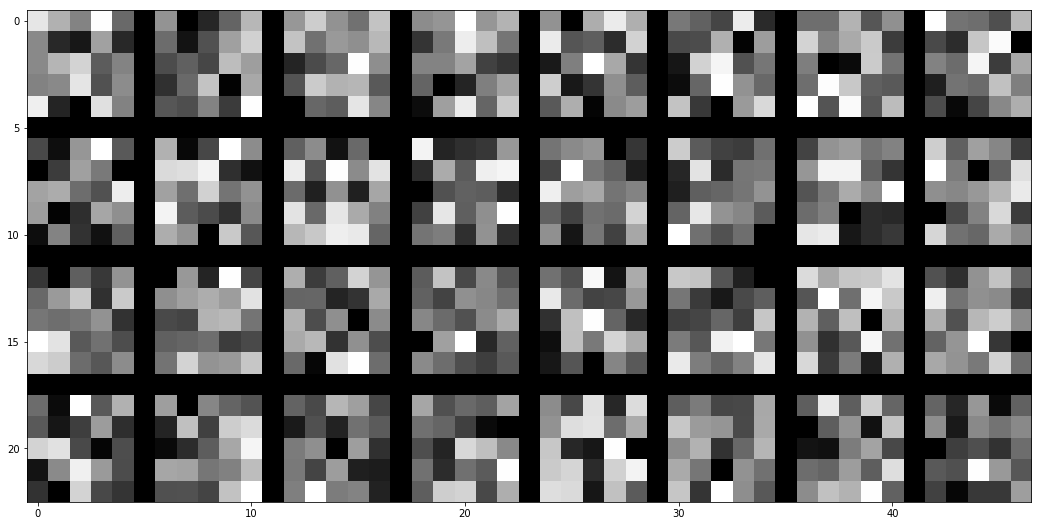

In [43]:
!wget --output-document utils1.py http://deeplearning.net/tutorial/code/utils.py
import utils1
from utils1 import tile_raster_images
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

image = Image.fromarray(tile_raster_images(kernels, img_shape=(5, 5) ,tile_shape=(4, 8), tile_spacing=(1, 1)))

# Plot image
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')  

Do you want to see the output of an image passing through the first convolution layer?


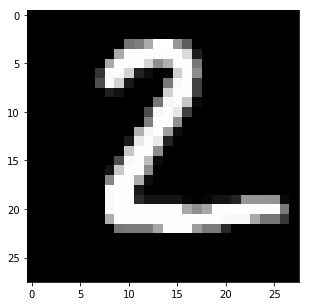

In [44]:
import numpy as np
plt.rcParams['figure.figsize'] = (5.0, 5.0)
sampleimage = mnist.test.images[1]
plt.imshow(np.reshape(sampleimage, [28, 28]), cmap="gray")

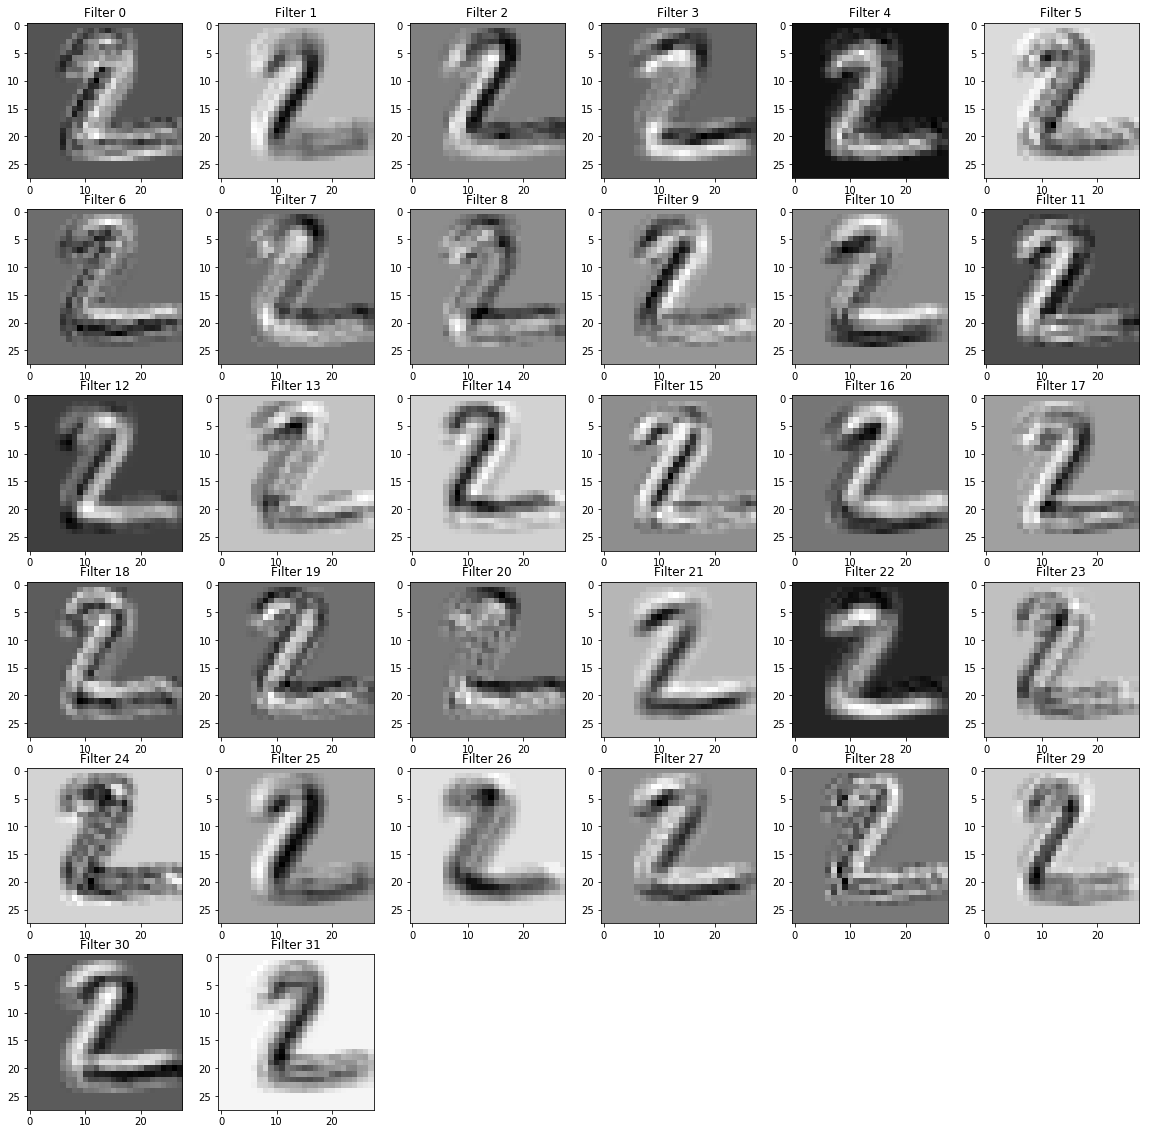

In [45]:
ActivatedUnits = sess.run(convolve1, feed_dict={x: np.reshape(sampleimage, [1, 784], order='F'), keep_prob: 1.0})
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20, 20))
n_columns = 6
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i + 1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

What about the second convolution layer?

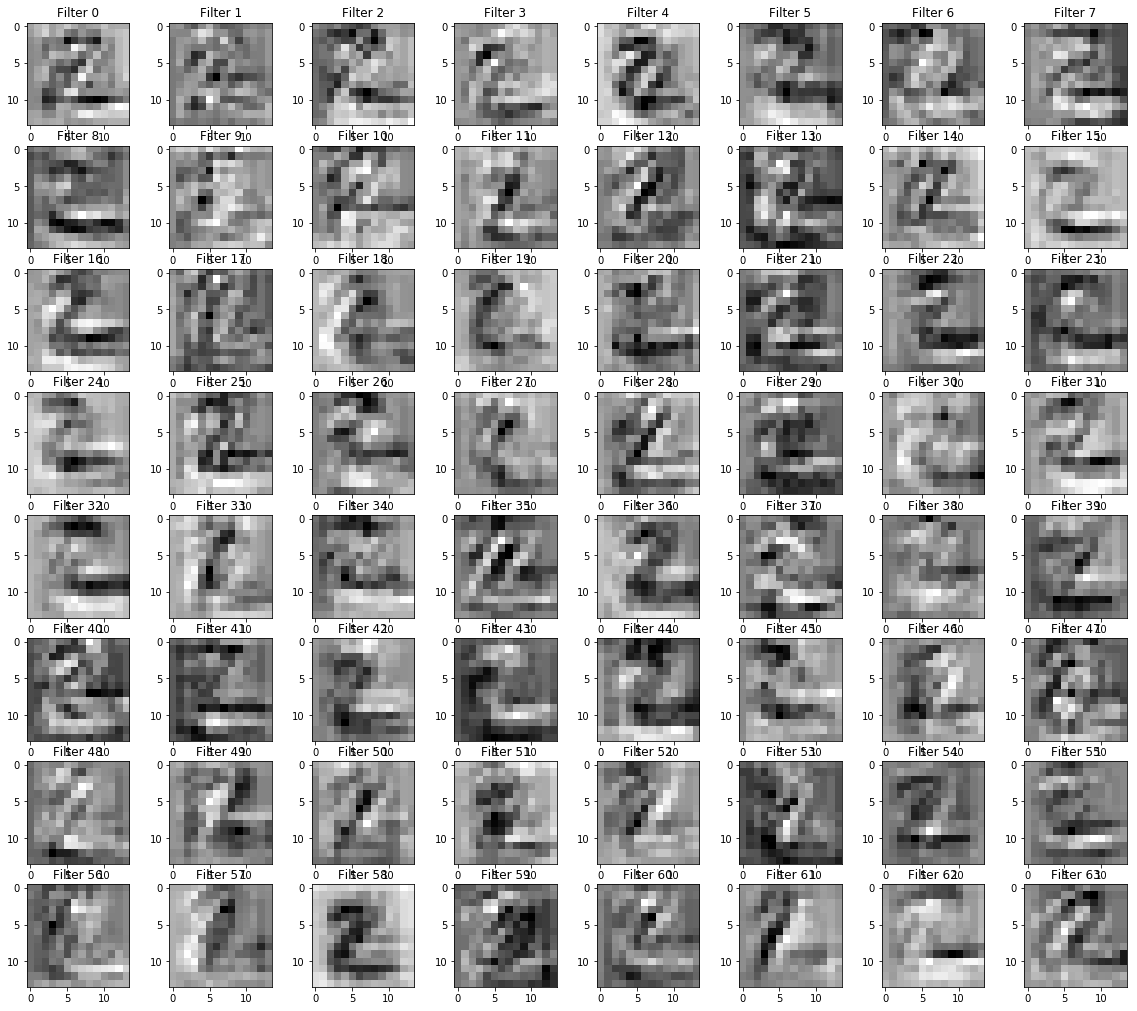

In [46]:
ActivatedUnits = sess.run(convolve2, feed_dict={x: np.reshape(sampleimage, [1, 784], order='F'), keep_prob: 1.0})
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20, 20))
n_columns = 8
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i + 1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

In [47]:
sess.close()  # Finish the session

### References:

https://en.wikipedia.org/wiki/Deep_learning    
http://sebastianruder.com/optimizing-gradient-descent/index.html#batchgradientdescent  
http://yann.lecun.com/exdb/mnist/  
https://www.quora.com/Artificial-Neural-Networks-What-is-the-difference-between-activation-functions  
https://www.tensorflow.org/versions/r0.9/tutorials/mnist/pros/index.html  